# Linking to documents and resources

Leveraging the ability to link between resources can serve many goals.  We may
wish to demonstrate connections between people and courses they have taken or
or organizations they are connected with.   We may be wishing to link documents
to people or organizations.   

This section will review two key thematic profiles and some examples of how to
express links from them to other resources.   Our goal will be different in various
cases.  The two profiles are type CreativeWork and type Organization. 

In the case of _Organization our purpose may be to express alignment to various
principles and policies_.  These might provide people with an understanding of
the goals of an organization when they are searching for or assessing them.

In the case of _CreativeWork we are looking to express connections to the
publisher and provider of the creative work_.   This is mostly to connect these
works with the responsible party associated with them but may also serve to
connect to the principles they are associated with. 



## Organization link options

In the following section we will look at three different options for expressing
links between an organization and resources that describe the policy and 
principles of the subject organization.

First we will see the full data graph.  We have highlighted the sections we 
we will review here.  Namely the subjectOF and publishingPrinciples 
predicates. 


```{literalinclude} ./graphs/org.json
:linenos:
:emphasize-lines: 31-53
```

Fontconfig error: "/etc/fonts/conf.d/30-0-google-crosextra-caladea-fonts.conf", line 1: Extra content at the end of the document

Fontconfig error: "/etc/fonts/conf.d/60-open-sans.conf", line 1: Extra content at the end of the document

Fontconfig error: "/etc/fonts/conf.d/62-google-crosextra-caladea-fonts.conf", line 1: Extra content at the end of the document



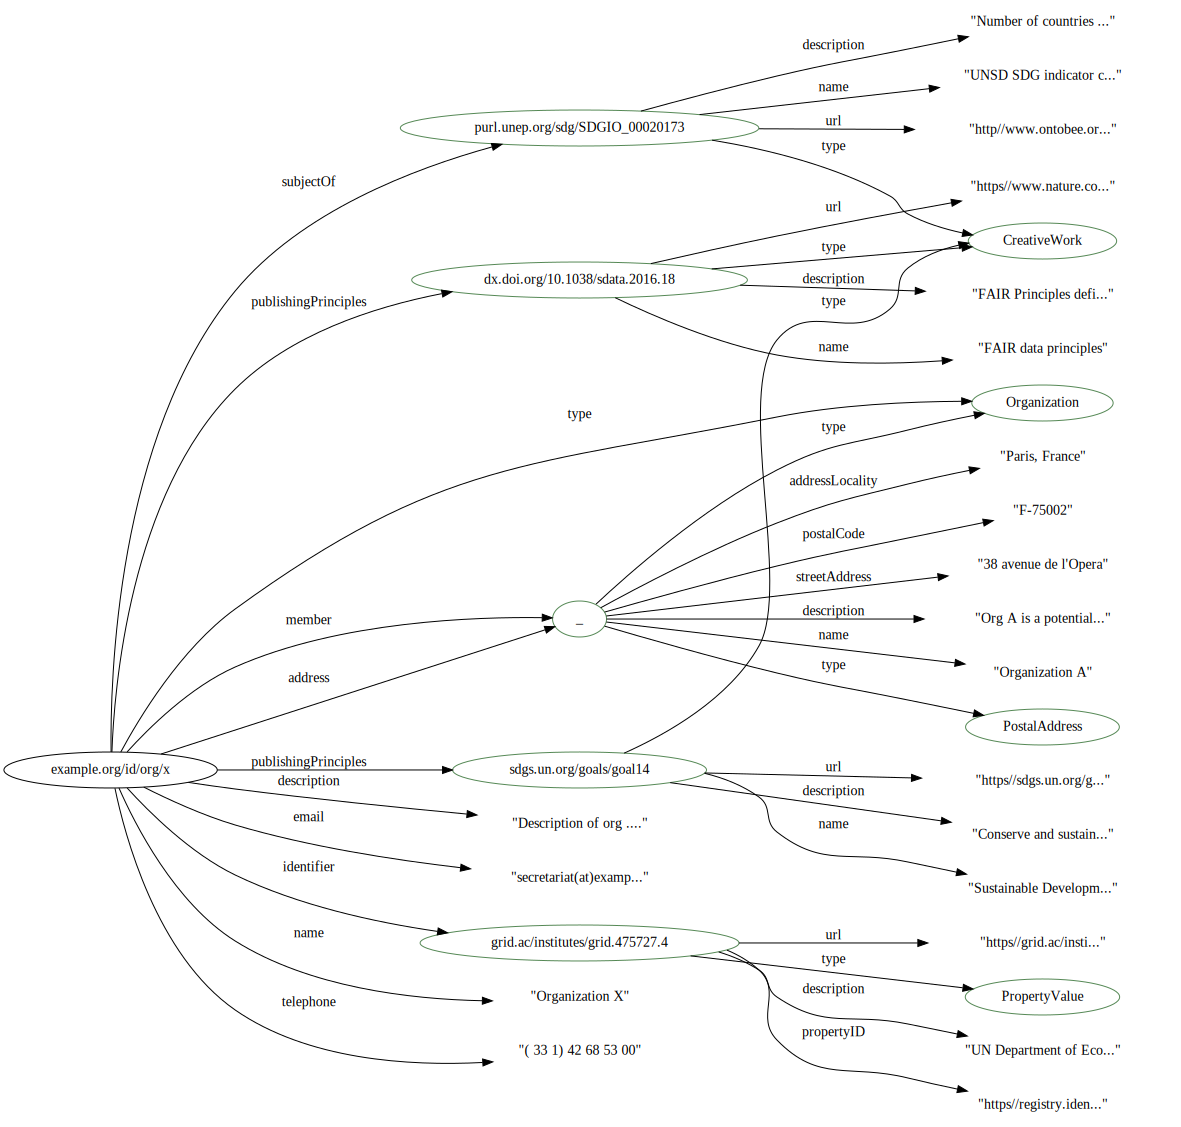

In [1]:
import json
from pyld import jsonld
import os, sys

currentdir = os.path.dirname(os.path.abspath(''))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)
from lib import jbutils

with open("./graphs/org.json") as dgraph:
    doc = json.load(dgraph)

context = {
    "@vocab": "https://schema.org/",
}

compacted = jsonld.compact(doc, context)
jbutils.show_graph(compacted)

### subjectOf


````{panels}
Values expected to be one of these types
^^^
* [Event](https://schema.org/Event)
* [CreativeWork](https://schema.org/CreativeWork)
+++
Range
---

Used on these types
^^^
* [Thing](https://schema.org/Thing)
+++
Domain
````

Lets take a look at subjectOf.  In this case we are using subjectOf to express
a connection to a UN SDG.  This, subjectOf, could also be used to connect 
documents describing the policy and principles of an organization or additional 
metadata for a creative work.  When we look at [subjectOf](https://schema.org/subjectOf)
we can see we are allowed are allowed to use it on any type Thing, but must point
to a CreativeWork or Event.  


```{note}
Recall that in the case of OIH types, the type CourseInstance or EducationEvent are both
subtype of Event.  Given that we can use subjectOf to connect a Thing to these types
as well.  Also, Course is a subtype of CreativeWork, so we are good there too in the 
context of the range of subjectOf.   Reference thematic type [Training](../training/README.md)
```

Fontconfig error: "/etc/fonts/conf.d/30-0-google-crosextra-caladea-fonts.conf", line 1: Extra content at the end of the document

Fontconfig error: "/etc/fonts/conf.d/60-open-sans.conf", line 1: Extra content at the end of the document

Fontconfig error: "/etc/fonts/conf.d/62-google-crosextra-caladea-fonts.conf", line 1: Extra content at the end of the document



{
    "@context": {
        "@vocab": "https://schema.org/"
    },
    "@id": "https://example.org/id/org/x",
    "@type": "Organization",
    "subjectOf": {
        "@id": "http://purl.unep.org/sdg/SDGIO_00020173",
        "@type": "CreativeWork",
        "description": "Number of countries making progress ... the oceans and their resources",
        "name": "UNSD SDG indicator code:C140c01",
        "url": "http://www.ontobee.org/ontology/SDGIO?iri=http://purl.unep.org/sdg/SDGIO_00020173"
    }
}


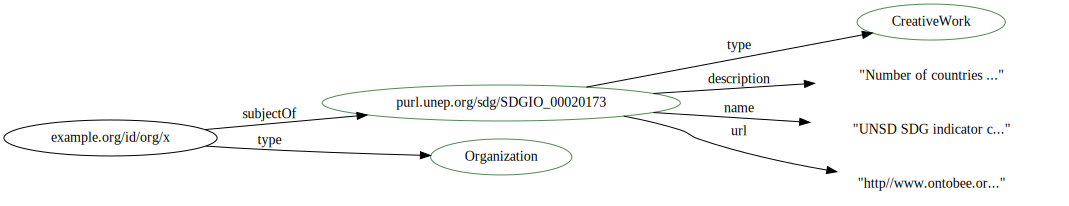

In [2]:
import json
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph
from pyld import jsonld
import graphviz
import os, sys

currentdir = os.path.dirname(os.path.abspath(''))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)
from lib import jbutils

with open("./graphs/org.json") as dgraph:
    doc = json.load(dgraph)

frame = {
  "@context": {"@vocab": "https://schema.org/"},
  "@explicit": "true",
  "@requireAll": "true",
  "@type":     "Organization",
  "subjectOf": ""
}

context = {
    "@vocab": "https://schema.org/",
}

compacted = jsonld.compact(doc, context)

framed = jsonld.frame(compacted, frame)
jd = json.dumps(framed, indent=4)
print(jd)

jbutils.show_graph(framed)

### publishingPrinciples

````{panels}
Values expected to be one of these types
^^^
* [CreativeWork](https://schema.org/CreativeWork)
* [URL](https://schema.org/URL)
+++
Range
---

Used on these types
^^^
* [CreativeWork](https://schema.org/CreativeWork)
* [Organization](https://schema.org/Organization)
* [Person](https://schema.org/Person)
+++
Domain
````

Lets take a look at [publishingPrinciples](https://schema.org/publishingPrinciples).  This can be used 
to connect CreativeWork, Organization, or Person to either of CreativeWork or URL.  So this 
allows us to link a CreativeWork to a policy or principle statement.  This has some very useful
use cases where resources can be grouped based on their connection to those principles and policies.

Fontconfig error: "/etc/fonts/conf.d/30-0-google-crosextra-caladea-fonts.conf", line 1: Extra content at the end of the document

Fontconfig error: "/etc/fonts/conf.d/60-open-sans.conf", line 1: Extra content at the end of the document

Fontconfig error: "/etc/fonts/conf.d/62-google-crosextra-caladea-fonts.conf", line 1: Extra content at the end of the document



{
    "@context": {
        "@vocab": "https://schema.org/"
    },
    "@id": "https://example.org/id/org/x",
    "@type": "Organization",
    "publishingPrinciples": [
        {
            "@id": "https://sdgs.un.org/goals/goal14",
            "@type": "CreativeWork",
            "description": "Conserve and sustainably use the oceans, seas and marine resources for sustainable development",
            "name": "Sustainable Development Goal 14",
            "url": "https://sdgs.un.org/goals/goal14"
        },
        {
            "@id": "https://dx.doi.org/10.1038/sdata.2016.18",
            "@type": "CreativeWork",
            "description": "FAIR Principles definition as referenced from: Wilkinson, M. D. et al. The FAIR Guiding Principles for scientific data management and stewardship.",
            "name": "FAIR data principles",
            "url": "https://www.nature.com/articles/sdata201618"
        }
    ]
}


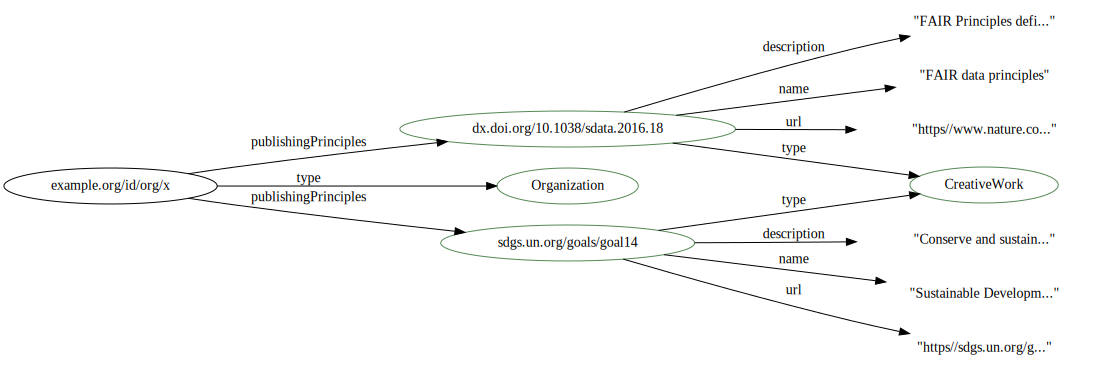

In [3]:
import json
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph
from pyld import jsonld
import graphviz
import os, sys

currentdir = os.path.dirname(os.path.abspath(''))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)
from lib import jbutils

with open("./graphs/org.json") as dgraph:
    doc = json.load(dgraph)

frame = {
  "@context": {"@vocab": "https://schema.org/"},
  "@explicit": "true",
  "@requireAll": "true",
  "@type":     "Organization",
  "publishingPrinciples": ""
}

context = {
    "@vocab": "https://schema.org/",
}

compacted = jsonld.compact(doc, context)

framed = jsonld.frame(compacted, frame)
jd = json.dumps(framed, indent=4)
print(jd)

jbutils.show_graph(framed)

## Sustainable Development Goals


The following example provides an an approach to connecting 
Sustainable Development Goals 
(SDGs) could be linked to via [subjectOf](https://schema.org/subjectOf).  

Other potential links could be made to things such 
as the [UNDRR-ISC Hazard Definition & Classification](https://www.undrr.org/publication/hazard-information-profiles-supplement-undrr-isc-hazard-definition-classification)

As this is a CreateWork, we can now use one more linking property, the 
Schema.org citation property.  By comparison, the 
[publishingPrinciples](https://schema.org/publishingPrinciples) or 
[subjectOf](https://schema.org/subjectOf) 
connections carry a bit more semantic meaning. 

```{literalinclude} ./graphs/doc.json
:linenos:
:emphasize-lines: 14-20

```

Fontconfig error: "/etc/fonts/conf.d/30-0-google-crosextra-caladea-fonts.conf", line 1: Extra content at the end of the document

Fontconfig error: "/etc/fonts/conf.d/60-open-sans.conf", line 1: Extra content at the end of the document

Fontconfig error: "/etc/fonts/conf.d/62-google-crosextra-caladea-fonts.conf", line 1: Extra content at the end of the document



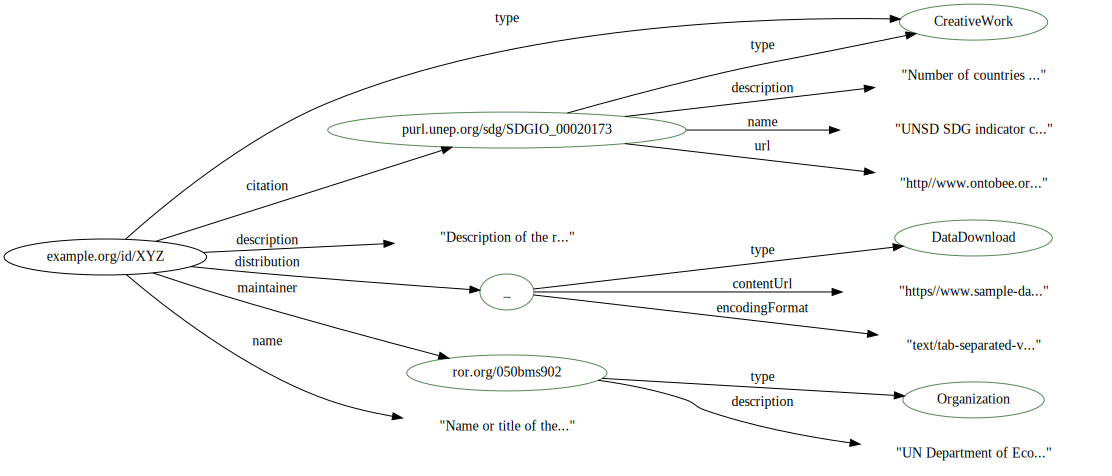

In [4]:
import json
from pyld import jsonld
import os, sys

currentdir = os.path.dirname(os.path.abspath(''))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)
from lib import jbutils

with open("./graphs/doc.json") as dgraph:
    doc = json.load(dgraph)

context = {
    "@vocab": "https://schema.org/",
}

compacted = jsonld.compact(doc, context)
jbutils.show_graph(compacted)

### citation

````{panels}
Values expected to be one of these types
^^^
* [Text](https://schema.org/Text)
* [CreativeWork](https://schema.org/CreativeWork)
+++
Range
---

Used on these types
^^^
* [CreativeWork](https://schema.org/CreativeWork)
+++
Domain
````

Schema.org [citation](https://schema.org/citation) provides a way to link to another creative work.
This property can be pointed to either Text or CreativeWork.  It should also be noted that citation 
can only be used on type [CreativeWork](https://schema.org/CreativeWork).  

Due to the limit to use on CreateWork only, this example is not seen in the 
above examplewhich is of type Organization.  

The actual semantics of citation is rather vague stating it is a method to 
cite or reference another creative work.

Fontconfig error: "/etc/fonts/conf.d/30-0-google-crosextra-caladea-fonts.conf", line 1: Extra content at the end of the document

Fontconfig error: "/etc/fonts/conf.d/60-open-sans.conf", line 1: Extra content at the end of the document

Fontconfig error: "/etc/fonts/conf.d/62-google-crosextra-caladea-fonts.conf", line 1: Extra content at the end of the document



{
    "@context": {
        "@vocab": "https://schema.org/"
    },
    "@id": "https://example.org/id/XYZ",
    "@type": "CreativeWork",
    "citation": {
        "@id": "http://purl.unep.org/sdg/SDGIO_00020173",
        "@type": "CreativeWork",
        "description": "Number of countries making progress ... the oceans and their resources",
        "name": "UNSD SDG indicator code:C140c01",
        "url": "http://www.ontobee.org/ontology/SDGIO?iri=http://purl.unep.org/sdg/SDGIO_00020173"
    }
}


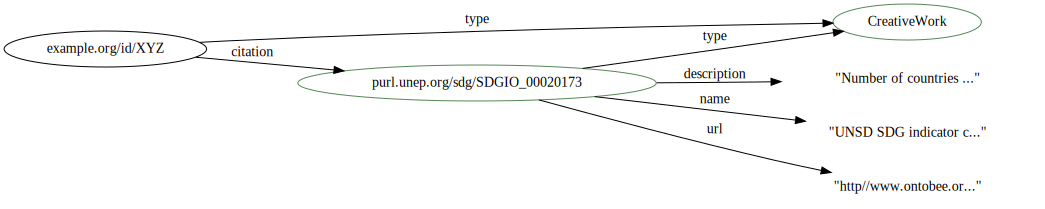

In [5]:
import json
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph
from pyld import jsonld
import graphviz
import os, sys

currentdir = os.path.dirname(os.path.abspath(''))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)
from lib import jbutils

with open("./graphs/doc.json") as dgraph:
    doc = json.load(dgraph)

frame = {
  "@context": {"@vocab": "https://schema.org/"},
  "@explicit": "true",
  "@requireAll": "true",
  "@type":     "CreativeWork",
  "citation": ""
}

context = {
    "@vocab": "https://schema.org/",
}

compacted = jsonld.compact(doc, context)

framed = jsonld.frame(compacted, frame)
jd = json.dumps(framed, indent=4)
print(jd)

jbutils.show_graph(framed)

## Refs

* [SDGs](http://www.ontobee.org/ontology/SDGIO?iri=http://purl.unep.org/sdg/SDGIO_00000000_)
* [SDG targets](http://www.ontobee.org/ontology/SDGIO?iri=http://purl.unep.org/sdg/SDGIO_00000001)
* [SDG indicators](http://www.ontobee.org/ontology/SDGIO?iri=http%3A%2F%2Fpurl.unep.org%2Fsdg%2FSDGIO_00000003)